<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

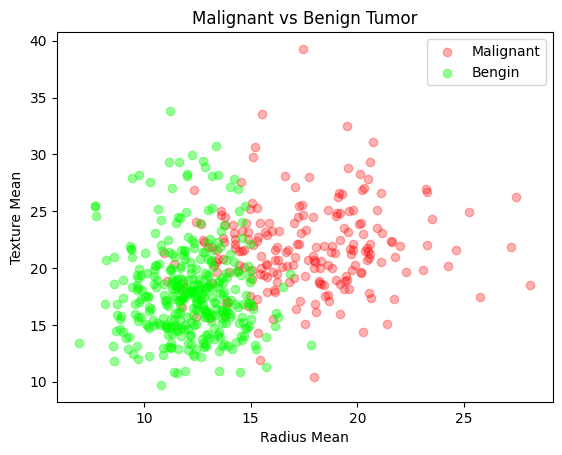

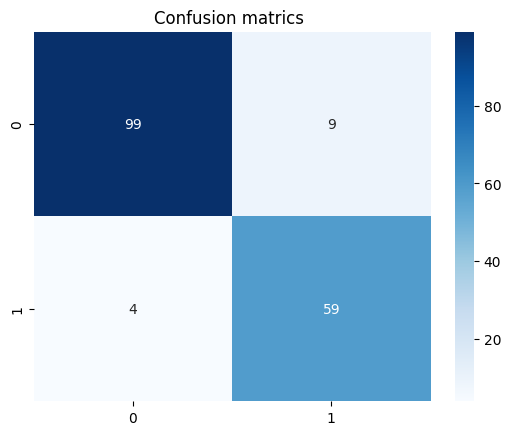

Accuracy of the classifier model is 0.9239766081871345


In [3]:
import numpy as n 
import pandas as p 
import seaborn as s 
import matplotlib.pyplot as m 
from sklearn.metrics import r2_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix 
 
data = p.read_csv("data.csv") 
data.info() 
data.drop(["id"],axis=1,inplace=True) 
M=data[data.diagnosis=="M"] 
B=data[data.diagnosis=="B"] 
 
m.title("Malignant vs Benign Tumor") 
m.xlabel("Radius Mean"); m.ylabel("Texture Mean") 
m.scatter(M.radius_mean,M.texture_mean,color='red',label='Malignant',alpha=0.3) 
m.scatter(B.radius_mean,B.texture_mean,color='lime',label='Bengin',alpha=0.4) 
m.legend(); m.show() 
 
data.diagnosis=[1 if i == "M" else 0 for i in data.diagnosis] 
x=data.drop(["diagnosis"],axis=1) 
y=data.diagnosis.values 
 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42) 
 
dt=DecisionTreeClassifier() 
dt.fit(x_train,y_train) 
y_pred=dt.predict(x_test) 
 
#Confusion Matrix 
cm = confusion_matrix(y_test,y_pred) 
s.heatmap(cm,annot=True,fmt='d',cmap="Blues") 
m.title("Confusion matrics ") 
m.show() 
print("Accuracy of the classifier model is",accuracy_score(y_test,y_pred))